# **Loading and Understanding the Data**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aungpyaeap/supermarket-sales")

print("Path to dataset files:", path)

100%|██████████| 35.9k/35.9k [00:00<00:00, 42.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aungpyaeap/supermarket-sales/versions/3


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
file_path = f"{path}/supermarket_sales - Sheet1.csv"
df = pd.read_csv(file_path)


In [ ]:
# 1. Understand the Data
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nDataset Shape:", df.shape)

First 5 rows of the dataset:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905  

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


# **Data Cleaning**

In [ ]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify cleaning steps
print("\nData after cleaning:")
print(df.info())
print(df.shape)


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment      

# **Exploratory Data Analysis**

In [ ]:
# Sales by Branch
branch_sales = df.groupby('Branch')['Total'].sum().reset_index()
print("\nSales by Branch:")
print(branch_sales)


Sales by Branch:
  Branch        Total
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065


In [ ]:
# Sales by Gender
gender_sales = df.groupby('Gender')['Total'].sum().reset_index()
print("\nSales by Gender:")
print(gender_sales)


Sales by Gender:
   Gender       Total
0  Female  167882.925
1    Male  155083.824


In [ ]:
# Payment Method Analysis
payment_sales = df.groupby('Payment')['Total'].sum().reset_index()
print("\nSales by Payment Method:")
print(payment_sales)


Sales by Payment Method:
       Payment       Total
0         Cash  112206.570
1  Credit card  100767.072
2      Ewallet  109993.107


In [ ]:
# Relationship between Ratings and Sales
rating_sales_corr = df['Rating'].corr(df['Total'])
print("\nCorrelation between Ratings and Sales:", rating_sales_corr)



Correlation between Ratings and Sales: -0.03644170499701834


# **Data Visualization**

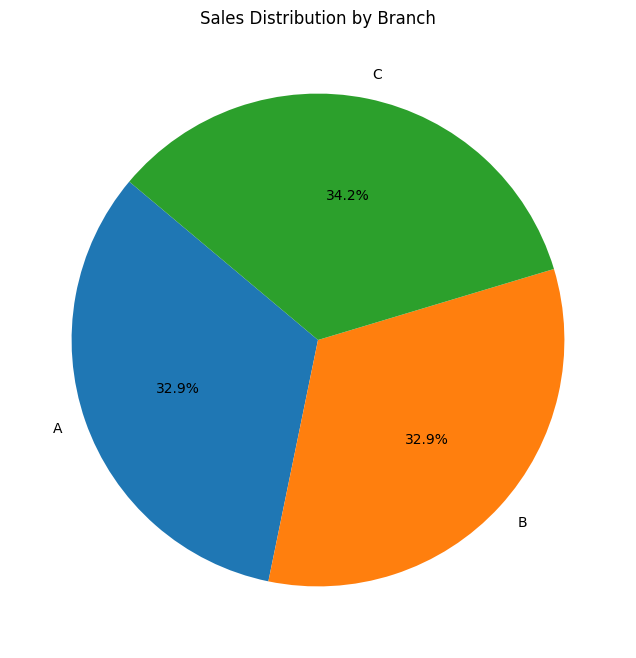

In [ ]:
# Pie Chart: Sales distribution by Branch
plt.figure(figsize=(8, 8))
plt.pie(branch_sales['Total'], labels=branch_sales['Branch'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Branch')
plt.show()

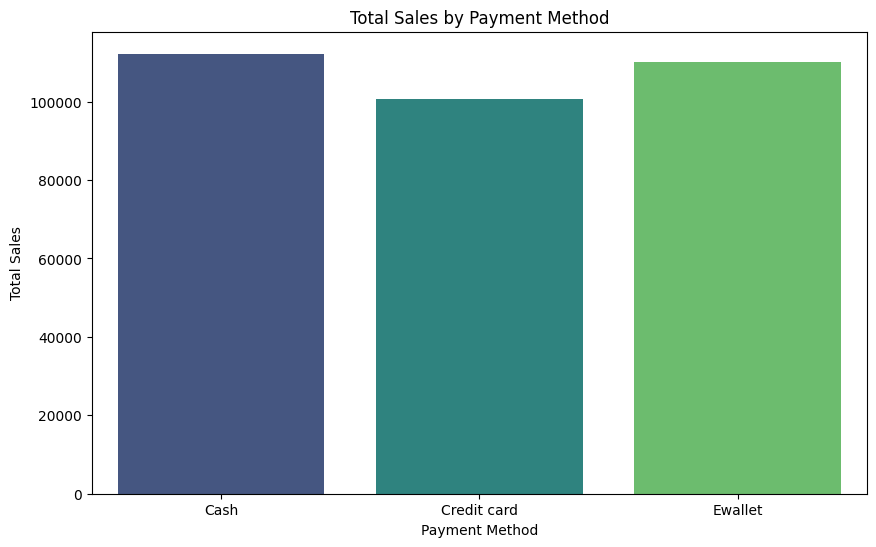

In [ ]:
# Bar Chart: Payment Methods vs Total Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_sales, x='Payment', y='Total', hue = 'Payment', palette='viridis', legend = False)
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()



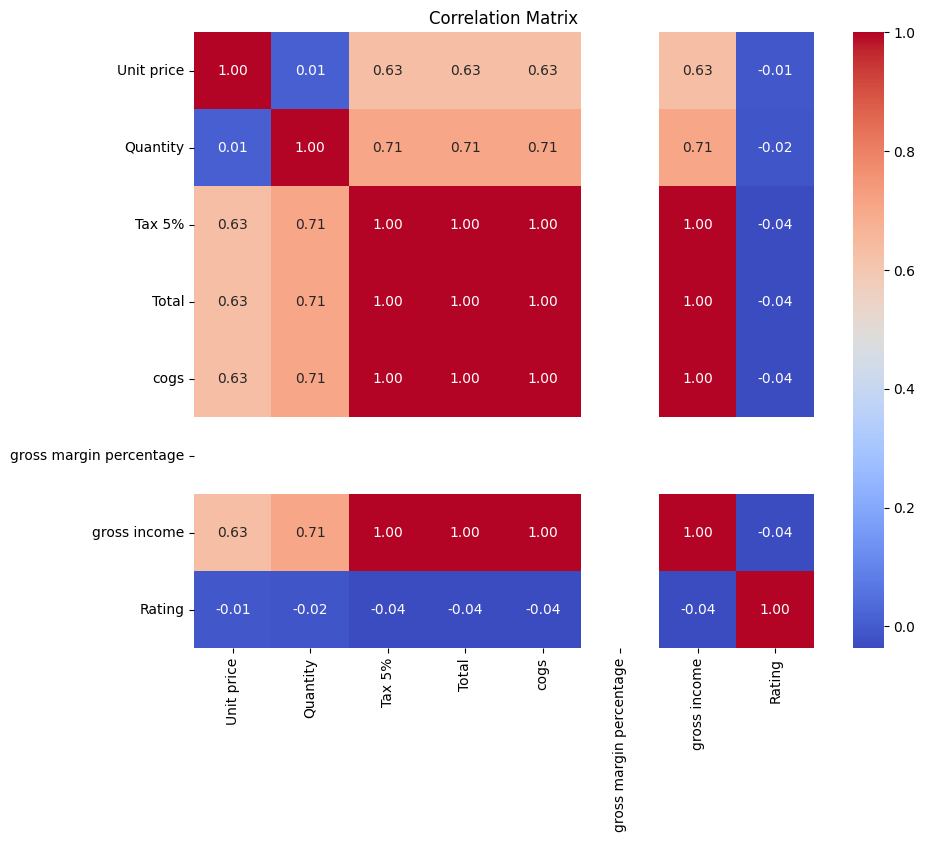

In [ ]:
# Heatmap: Correlation Matrix
# Filter numerical columns only
numerical_cols = df.select_dtypes(include=['number'])
# Compute correlation matrix
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



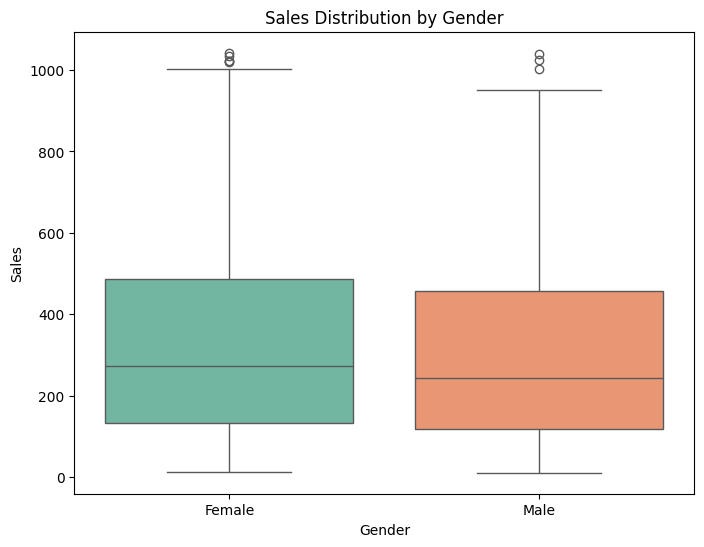

In [ ]:
# Boxplot: Sales by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Total', hue = 'Gender', palette='Set2', legend = False)
plt.title('Sales Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.show()

# **Summary and Insights**

**Branch Sales Insights:**

*   The **Branch C** contributed the most to total sales, accounting for
approximately 34.2% of overall revenue.
*   **Branch A and B** generated the equal sales, possibly due to lower customer footfall or location-specific factors.

**Popular Payment Methods:**

*   The majority of customers used **Cash** for payments, with **Credit card** being the least preferred option, suggesting either customer reluctance or a preference for immediate payment.

**Customer Demographics:**


*   **Female** customers contributed slightly more to total sales compared to male customers.

**Relationship Insights:**


*   The correlation between **Ratings** and **Sales** is -0.04. This indicates a very weak **negative correlation** between the two variables. In practical terms, this means that there is almost no relationship between customer ratings and sales figures. As customer ratings increase or decrease, sales do not show a significant consistent pattern of change.








